In [36]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [27]:
dataset = pd.read_csv('../data/wine_quality/winequality-red.csv', sep=';')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

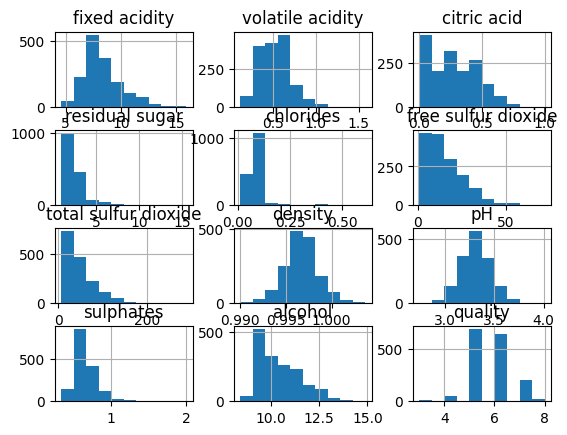

In [28]:
dataset.hist()

In [29]:
trainvalidation, test = train_test_split(dataset, test_size=0.3)
train, validation = train_test_split(trainvalidation, test_size=0.285)


array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

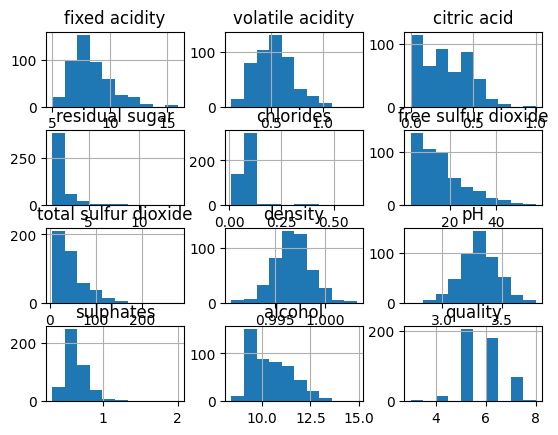

In [30]:
# fig, ax = plt.subplots(1, 2, figsize=(10, 5))
# test.hist(ax=ax[0])
test.hist()
# dataset.hist(ax=ax[1])

array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

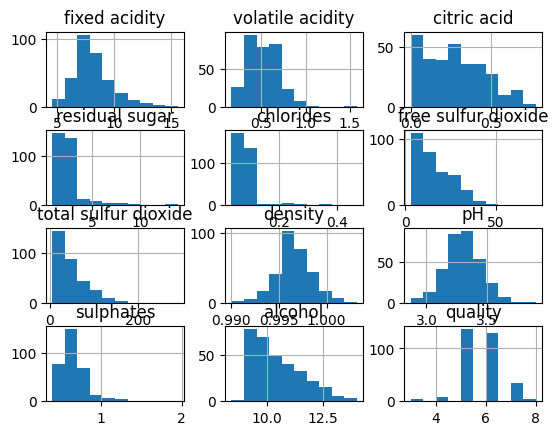

In [31]:
validation.hist()

In [32]:
dataset['quality'].value_counts()/len(dataset)

quality
5    0.425891
6    0.398999
7    0.124453
4    0.033146
8    0.011257
3    0.006254
Name: count, dtype: float64

In [33]:
test['quality'].value_counts()/len(test)

quality
5    0.427083
6    0.379167
7    0.143750
4    0.031250
8    0.010417
3    0.008333
Name: count, dtype: float64

In [34]:
validation['quality'].value_counts()/len(validation)

quality
5    0.426332
6    0.407524
7    0.109718
4    0.028213
8    0.015674
3    0.012539
Name: count, dtype: float64

In [40]:
# train_features = train.drop(columns=['quality'])
train_features = train.drop('quality', axis=1)
validation_features = validation.drop('quality', axis=1)
test_features = test.drop('quality', axis=1)
train_targets = train['quality']
test_targets = test['quality']
validation_targets = validation['quality']

In [ ]:
def evaluate(model, final_eval=False):
    train_predictions = model.predict(train)
    validation_predictions = model.predict(train)
    print("Train MAE:", mean_absolute_error(train_targets, train_predictions))
    print("Train MSE:", mean_squared_error(train_targets, train_predictions))
    print("Train R2:", r2_score(train_targets, train_predictions))

    print("Validation MAE:", mean_absolute_error(validation_targets, validation_predictions))
    print("Validation MSE:", mean_squared_error(validation_targets, validation_predictions))
    print("Validation R2:", r2_score(validation_targets, validation_predictions))

    if final_eval:
        test_predictions = model.predict(train)
        print("Test MAE:", mean_absolute_error(test_targets, test_predictions))
        print("Test MSE:", mean_squared_error(test_targets, test_predictions))
        print("Test R2:", r2_score(test_targets, test_predictions))
